In [84]:
# Import Libraries
import pandas as pd
import numpy as np

In [85]:
# Import dataset and display the first five rows
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
# Display the data set information
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here we can see that there are 5 object datatypes and others are numerical values

In [87]:
# Finding the null values in the dataset
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have 177 null values in the 'Age' column and 687 null values in 'Cabin' column and 2 null values in 'Embarked' column

In [88]:
# Droping the columns irrelevant columns
titanic_df.drop(columns = ['Name','Ticket','PassengerId','Cabin'], axis=1, inplace=True)

Here we have 177 null values in our 'Age' column. So instead of droping those entries, we can find the average and fill the null value spaces with the average.

In [89]:
# Finding the avaerage of values in the Age column
avg_age=round(titanic_df["Age"].mean(),0)
avg_age

# Replacing the null values with average of age 
titanic_df=titanic_df.fillna(avg_age)

# Checking the null values
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [90]:
# Finding the unique values in the 'Sex' column
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [91]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,S,False,True
1,1,1,38.0,1,0,71.2833,C,True,False
2,1,3,26.0,0,0,7.9250,S,True,False
3,1,1,35.0,1,0,53.1000,S,True,False
4,0,3,35.0,0,0,8.0500,S,False,True


Now, we do the same to the "Embarked" column.

In [92]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_30.0,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,False,True


In [94]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
#from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# for visualisation
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call


In [53]:
# Creating independent and depentent variables  
X = titanic_df.drop(columns =['Survived'])
y = titanic_df['Survived']
r =42

# Splitting the data set into train_full and test sets
X_train_full,X_test,y_train_full,y_test = train_test_split(X,y,test_size = 0.2, random_state = r)

# Splitting the train_full set further into train and dev sets
X_train,X_dev,y_train,y_dev = train_test_split(X_train_full,y_train_full,test_size = 0.2, random_state = r)


In [95]:
# training a model without pruning
unpruned = DecisionTreeClassifier(max_depth=None, random_state=r)
unpruned.fit(X_train, y_train)
print("Performance without pruning:", unpruned.score(X_test, y_test))
print("At depth:", unpruned.tree_.max_depth)

Performance without pruning: 0.7541899441340782
At depth: 23


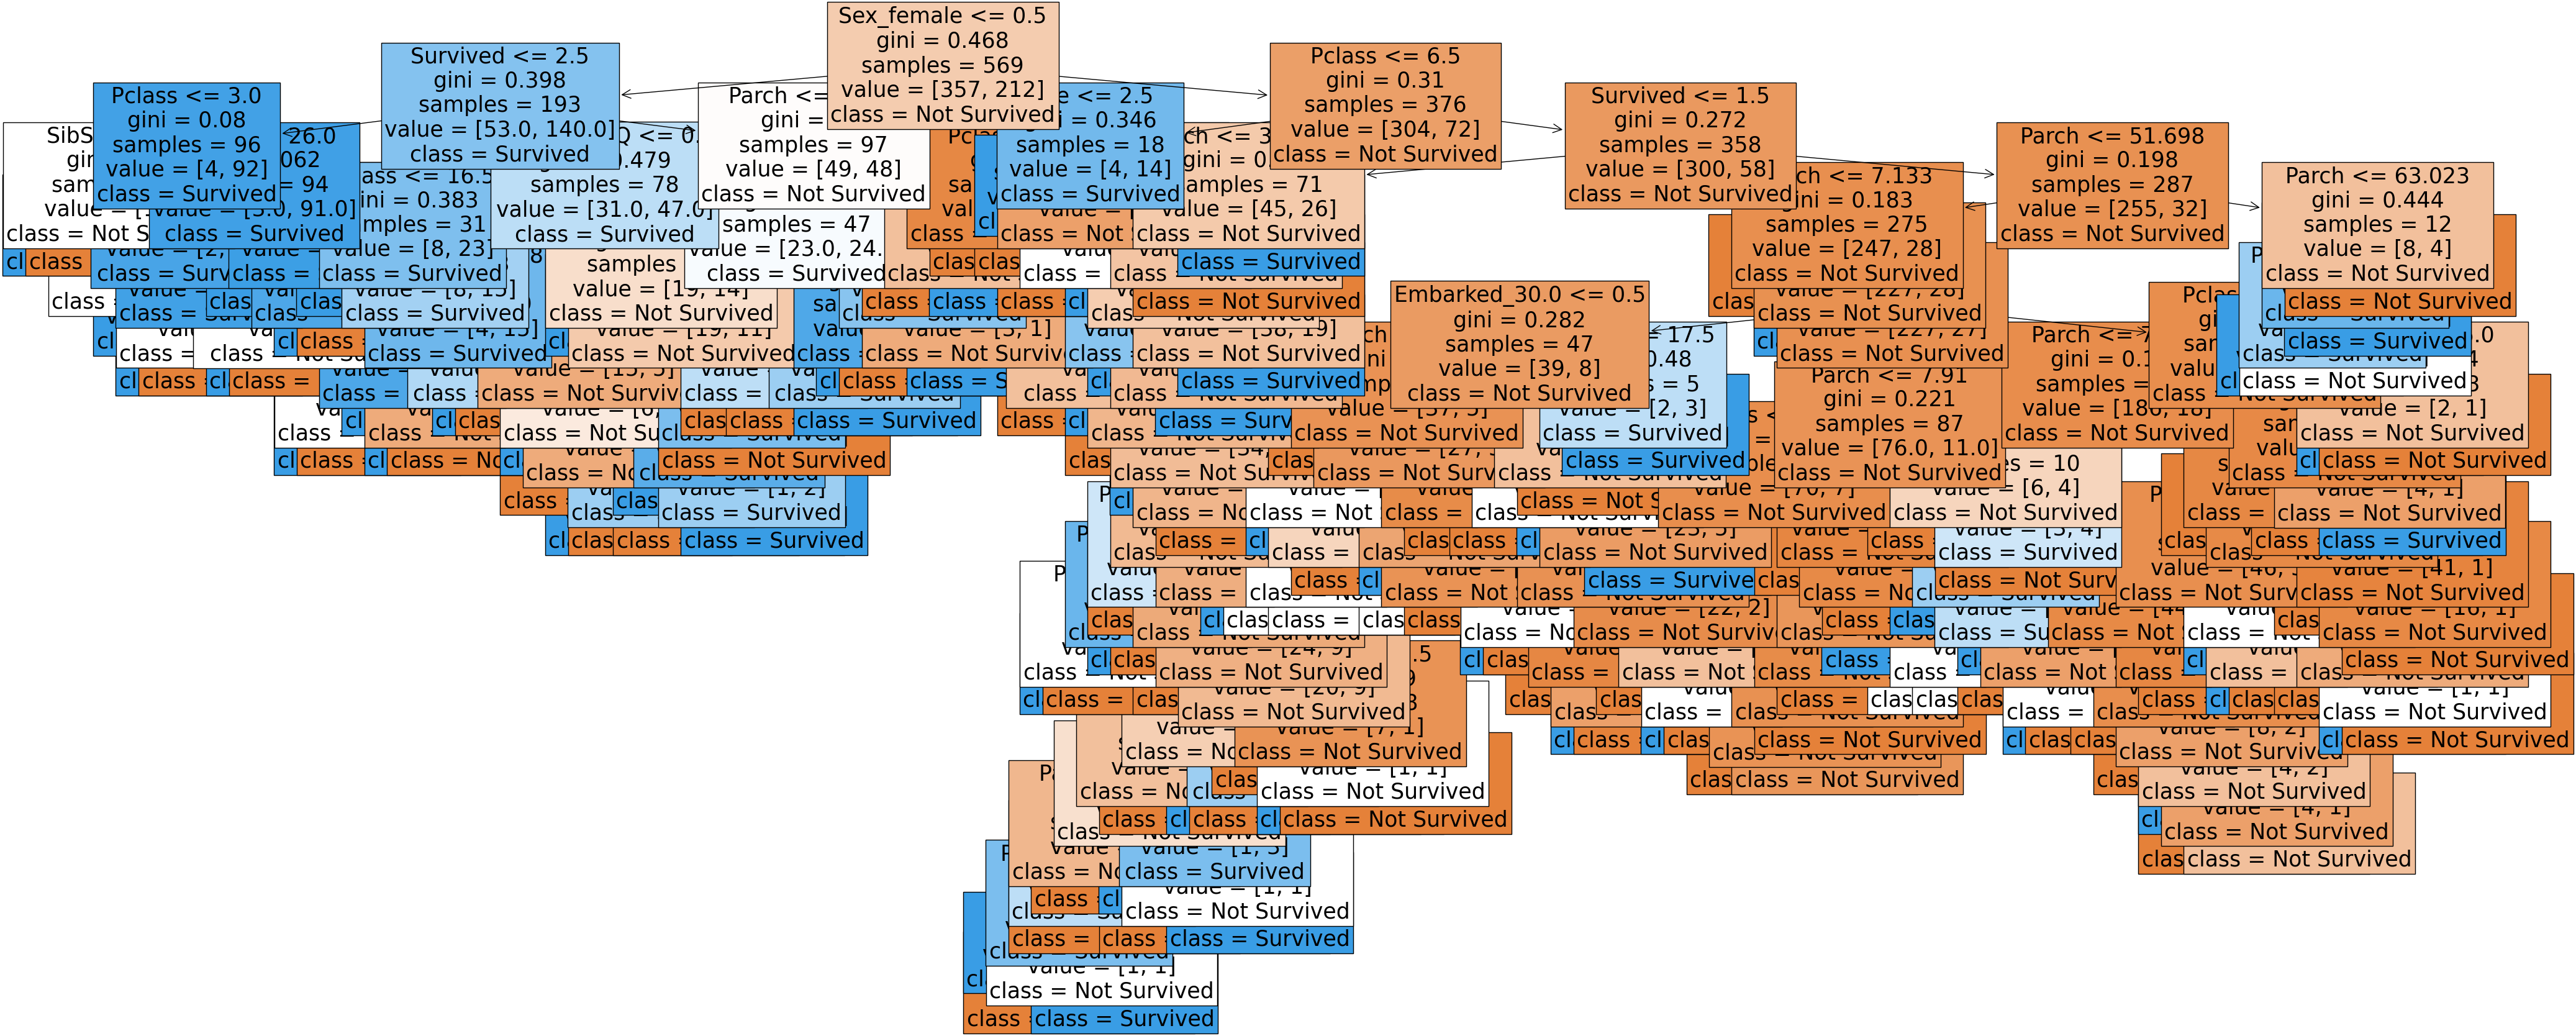

In [97]:
# Plot a decision tree
plt.figure(figsize=(50,20))
features = titanic_df.columns
classes = ['Not Survived','Survived']
tree.plot_tree(unpruned,feature_names=features,class_names=classes,filled=True,fontsize=25)
plt.show()

In [58]:
print(f"Accuracy of model on development set:",accuracy_score(y_dev,unpruned.predict(X_dev)))

Accuracy of model on development set: 0.7622377622377622


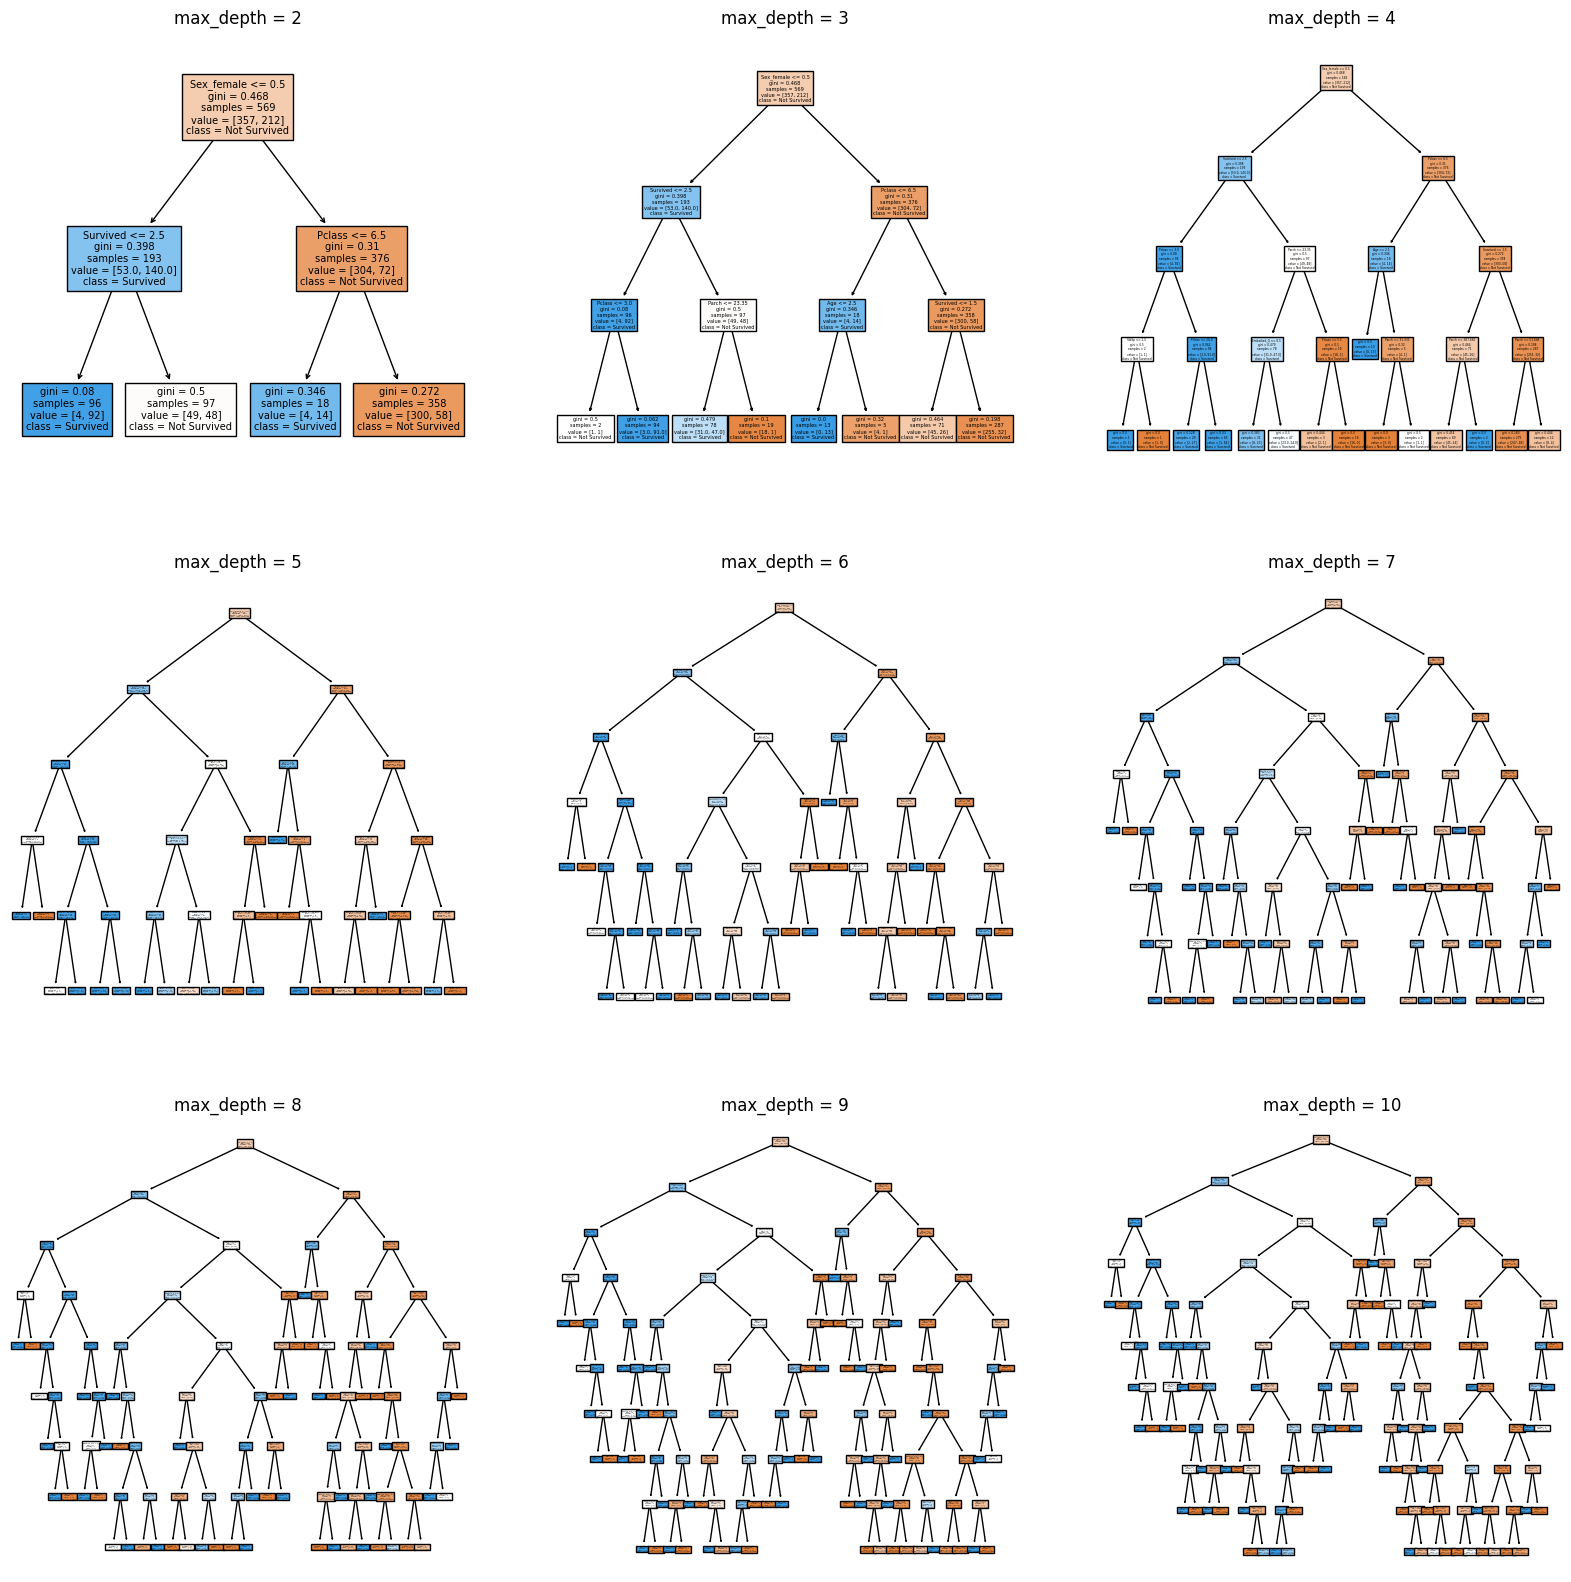

In [98]:
#  Creating empty list to accuracies
train_accuracies = [] 
dev_accuracies = []

# Set up subplot for Decision Tree
fig, axes = plt.subplots(3,3, figsize=(20,20))
axes = axes.flatten() # for easy iteration

# Loop over diffrent values of max_depth
for i, max_depth in enumerate(range(2,11)):

    # Train the Decision tree model with the current max_path
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=r)
    clf.fit(X_train, y_train)

    # Predict on training and test sets
    y_train_pred = clf.predict(X_train)
    y_dev_pred = clf.predict(X_dev)

   # Compute accuracies
   
    train_acc = accuracy_score(y_train, y_train_pred)
    dev_acc = accuracy_score(y_dev,y_dev_pred)
   
   # Store Accuracies
    train_accuracies.append(train_acc)
    dev_accuracies.append(dev_acc)

  # Plot Decision tree
    tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True, ax=axes[i])
    axes[i].set_title(f"max_depth = {max_depth}")

# Adjust layout
plt.tight_layout
plt.show()


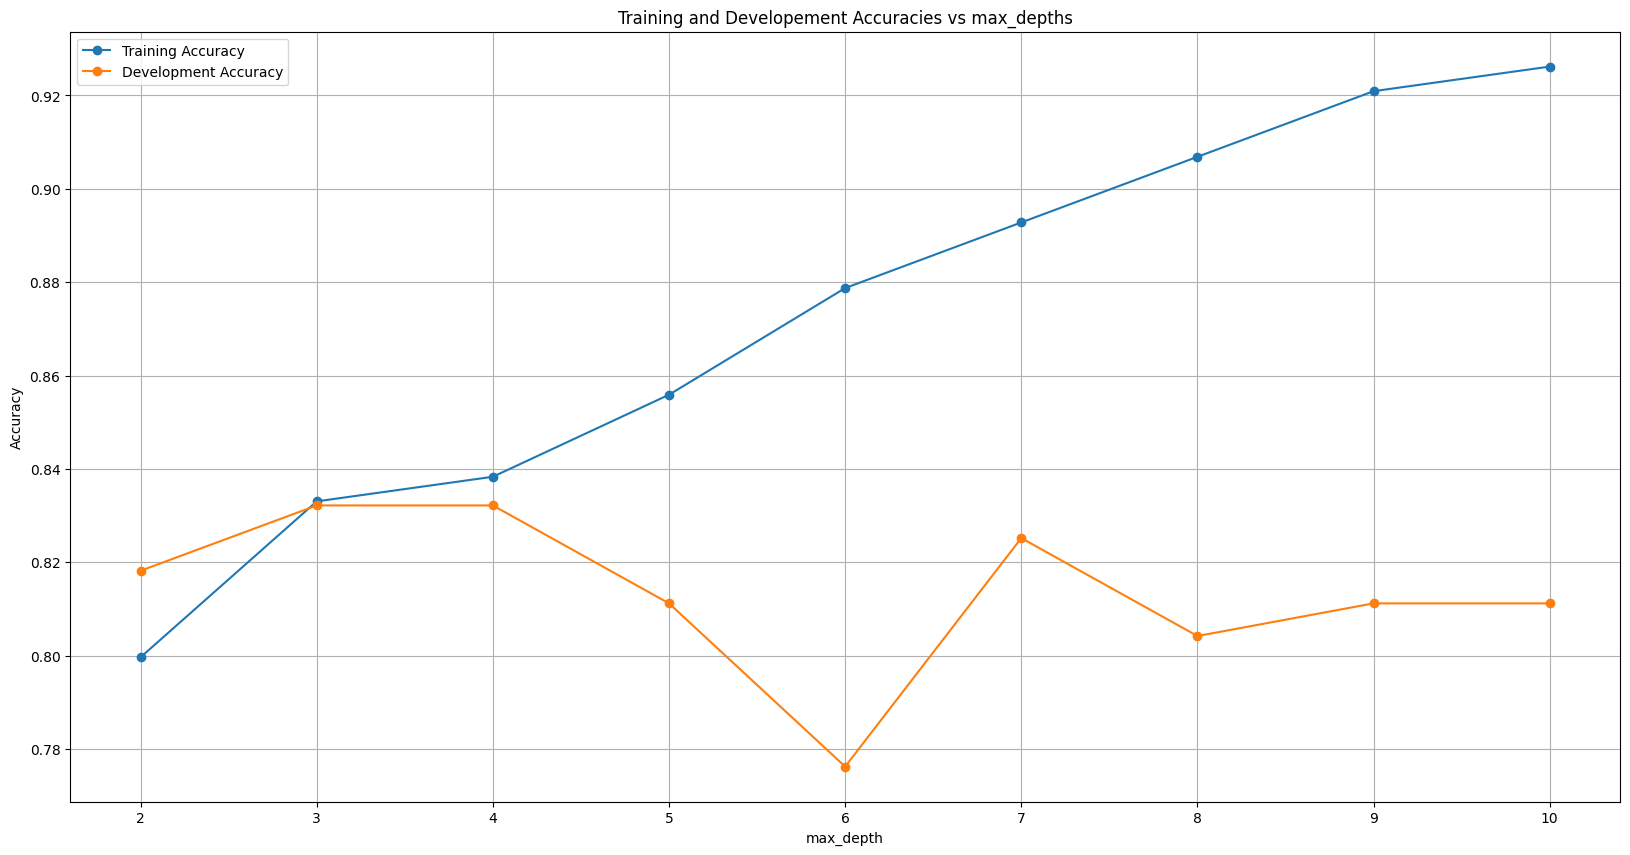

In [99]:
# Plot accuracies vs max_depth
plt.figure(figsize=(20,10))
plt.plot(range(2,11),train_accuracies,marker = 'o',label='Training Accuracy')
plt.plot(range(2,11),dev_accuracies,marker = 'o',label = 'Development Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Training and Developement Accuracies vs max_depths')
plt.legend()
plt.grid(True)
plt.show()

In the above line graph, blue line represents train data and yellow line represents development data. This is showing a very low max_depth of 3. This means that the resulting tree will have a maximum depth of 3 levels making it relatively shallow and simpler.

In [100]:
# fitting the chosen tree-train data
best_depth_train = max_depths[np.argmax(train_accuracies)]
print('Best performance of train set reached at depth of:', best_depth_train)
# fitting the chosen tree-dev data
best_depth_dev = max_depths[np.argmax(dev_accuracies)]
print('Best performance of development set  reached at depth of:', best_depth_dev)


Best performance of train set reached at depth of: 10
Best performance of development set  reached at depth of: 3


In [101]:
# Finding the accuracy of final model on test data with train set
final_model_train = DecisionTreeClassifier(max_depth=best_depth_train, random_state=r)
final_model_train.fit(X_train,y_train)
test_accuracy_train = accuracy_score(y_test,final_model_train.predict(X_test))
print(f"Final model accuracy score on test data with train model:",test_accuracy_train)

Final model accuracy score on test data with train model: 0.7932960893854749


In [102]:
# Finding the accuracy of final model on test data with dev set
final_model_dev = DecisionTreeClassifier(max_depth=best_depth_dev, random_state=r)
final_model_dev.fit(X_dev,y_dev)
test_accuracy_dev = accuracy_score(y_test,final_model_dev.predict(X_test))
print(f"Final model accuracy score on test data with dev model:",test_accuracy_dev)

Final model accuracy score on test data with dev model: 0.7541899441340782
